<a href="https://colab.research.google.com/gist/VS-CDR/b2c46e433cd845852e38b003e69c7d6a/probability-theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng()

30. Сгенерировать результат следующего эксперимента: 100 раз подбросили
симметричную монету. Предполагаем, что выпасть может или орёл (исход "1"), или решка (исход "0"). Посчитайте долю выпадений орла.

In [ ]:
Result = Enum('Event', ['eagle', 'tail'])

In [ ]:
def experiment_with_a_coin():
  events = [Result.eagle, Result.tail]
  probabilities = [0.5, 0.5]

  number_of_throws = 100
  experiments = rng.choice(a=events, size=number_of_throws, p=probabilities)

  eagle_event_cnt = 0
  for result in experiments:
    if result == Result.eagle:
      eagle_event_cnt += 1

  return eagle_event_cnt / number_of_throws

In [ ]:
print(f'Доля выпадения орла : {experiment_with_a_coin()}')

Доля выпадения орла : 0.49


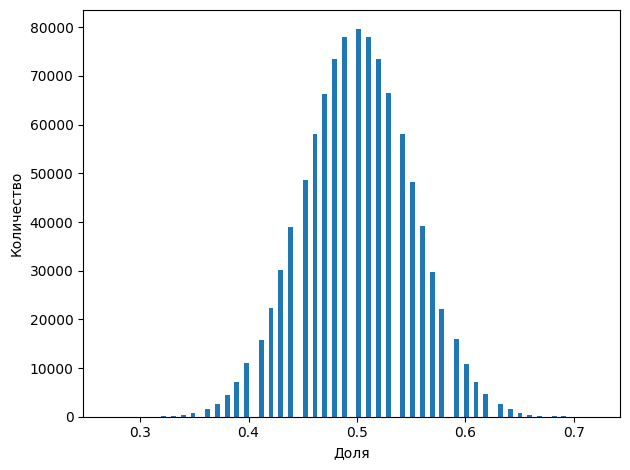

In [ ]:
num_of_results = 1000000
n_bins = 100

results = [experiment_with_a_coin() for i in range(num_of_results)]

fig, axs = plt.subplots(tight_layout=True)

axs.hist(results, n_bins)

axs.set_xlabel('Доля')
axs.set_ylabel('Количество')

plt.show()

31. Метод Монте-Карло для приближенного вычисления площади фигуры.

Пусть М1 = {$(x,y) \in \mathbb{R}^2: 0 ≤ x ≤ 1, 0≤ у ≤ x^2$}.

Чему равна вероятность того, что точка, выбираемая случайным образом из множества Q = {$(x,y) \in \mathbb{R}^2: 0 ≤ x ≤ 1, 0≤ у ≤ 1$}, попадет в М?

Провести следующий численный эксперимент.

Смоделировать выборку размера и из равномерного распределения на множестве и найти долю элементов выборки, попавших в М1. В качестве нужно использовать следующие значения: 10, 100, 1000.

С помощью аналогичных рассуждений найти (приближенно) площадь множества

М2 = {$(x,y) \in \mathbb{R}^2: 0 ≤ x ≤ 1, 0≤ у ≤ cos(sin(x))$}

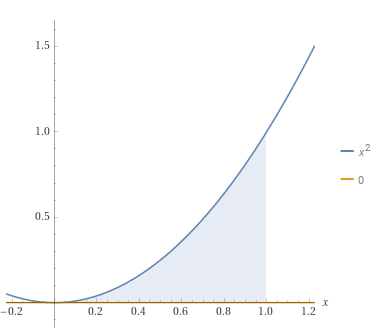

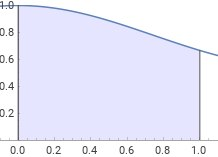

In [ ]:
from scipy.integrate import quad

M1 = quad(lambda x: x**2, 0, 1)
M2 = quad(lambda x: np.cos(np.sin(x)), 0, 1)

print(f'Площадь множетсва M1 = {M1[0]}, Площадь множества = {M2[0]}')

Площадь множетсва M1 = 0.33333333333333337, Площадь множества = 0.868740039576976


In [ ]:
def is_in_M1(x, y):
     return (0 <= x <= 1) and (0 <= y <= x**2)

def is_in_M2(x, y):
     return (0 <= x <= 1) and (0 <= y <= np.cos(np.sin(x)))

In [ ]:
set_limitations = {"M1" : is_in_M1, "M2" : is_in_M2}

In [ ]:
def method_Munte_Carlu(set_lims, set, extra=False):
  dim = 2
  sample_size = [10, 100, 1000]

  if extra:
    sample_size.append(10000)

  for size in sample_size:
    sample = rng.uniform(size=(dim, size))

    cnt_inside = 0
    for i in range(size):
      x, y = sample[0][i], sample[1][i]

      if set_lims[set](x,y):
        cnt_inside += 1

    proportion_of_inside = cnt_inside / size
    print(f'Доля точек, попавших в M_1 = {proportion_of_inside}')


In [ ]:
method_Munte_Carlu(set_limitations, 'M1')

Доля точек, попавших в M_1 = 0.3
Доля точек, попавших в M_1 = 0.33
Доля точек, попавших в M_1 = 0.309


Заметим, что с увеличением числа точек доля, попавших M_1 все лучше приближает реальную площадь.

In [ ]:
method_Munte_Carlu(set_limitations, 'M2')

Доля точек, попавших в M_1 = 0.9
Доля точек, попавших в M_1 = 0.87
Доля точек, попавших в M_1 = 0.892


In [ ]:
method_Munte_Carlu(set_limitations, 'M2', True)

Доля точек, попавших в M_1 = 0.9
Доля точек, попавших в M_1 = 0.86
Доля точек, попавших в M_1 = 0.881
Доля точек, попавших в M_1 = 0.8775


32. Задача вычислении с помощью «иглы Бюффона».

Бросим случайным образом иглу длины 1 на горизонтальный лист бумаги, разлинованный параллельными прямыми так, что расстояние между соседними прямыми также равно 1. Чему равна вероятность того, что упавшая игла пересечет линии бумаги. Повторим этот опыт N раз. Смоделировать, как будет расти с ростом N (т.е. при $N → ∞$) число пересечений упавшей иглы с линиями бумаги. Как полученные в эксперименте значения позволяют вычислить $\pi$? Оценить погрешность вычислений с помощью центральной предельной теоремы.

In [ ]:
from math import ceil
from tqdm import trange

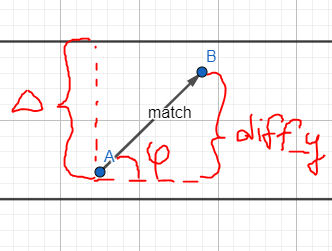

Рассмотрим произвольную иглу в xOy:

заметим что достаточно рассматривать такие иглы, которые образуют угол $ 0 ≤ φ ≤ \pi$ с положительным направлением Ox(другие иглы получаются из этих лишь обменом конца и начала).

Отсюда получаем критерий пересечения прямой и иглы:

Если расстояние от нижнего конца иглы до ближайшей прямой сверху (dist) < разности по Оу координат концов иглы, то есть пересечение

$diff_y = len(match) * sin(φ) \implies len(match) * sin(φ) > dist$

Откуда вероятность попадания $ P = \frac{\int_{0}^{\pi} len(match) * sin(φ) \,dφ}{\pi * width} = \frac{2 * len(match)}{\pi * width} = \frac{\text{кол-во пересечений}}{\text{кол-во бросков}}$

In [ ]:
borders = [
    [0, 10],
    [0, 10],
]

def drop_matches(up_lim, width=1, match_len=1):
  cnt_intercepts = 0
  cnt_misses = 0

  for i in trange(up_lim):
    y_beg = borders[1][0] + (borders[1][1] - borders[1][0]) * rng.random()
    y_end = y_beg + match_len * np.sin(np.radians(180.0 * rng.random()))

    closest_y = ceil(y_beg)

    y_diff_beg = closest_y - y_beg
    y_diff_end = y_end - y_beg

    if y_diff_end > y_diff_beg:
      cnt_intercepts += 1
    else:
      cnt_misses += 1

    if i % (up_lim / 10) == 0 and cnt_intercepts > 0:
      calc_proba = cnt_intercepts / (cnt_intercepts + cnt_misses)
      est_pi = (2.0 * match_len) / (calc_proba * width)
      print(f"\n Количество пересечений: {calc_proba}")
      print(f"\n Рассчитанное значение числа Пи: {est_pi}")

  calc_proba_final = cnt_intercepts / (cnt_intercepts + cnt_misses)
  return (2.0 * match_len) / (calc_proba_final * width)


Если $X_{i}$ независимы и одинаково распределены, $Z_{n}=\frac{\bar{X}_{n}-\mu}{\sqrt{\frac{\sigma^{2}}{n}}}$,
$Z\sim N(0;1)$, то:

\begin{equation}
|\mathbb{P}(Z_{n}\leq t)-\mathbb{P}(Z\leq t)|\leq c\cdot\frac{\mathbb{E}(|X_{i}-\mu|^{3})}{\sigma^{3}\sqrt{n}}
\end{equation}

Возьмем $c = 0,5$.

Применим эту теорему к биномиальному распределению:

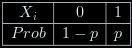

В этом случае:$\mathbb{E}(X_{i})=p$, $\mathbb{Var}(X_{i})=p(1-p)$, $\sigma=\sqrt{p(1-p)}$ и $\mathbb{E}(|X_{i}-p|^{3})=p(1-p)(p^{2}+(1-p)^{2})$:

\begin{equation}
\frac{\mathbb{E}(|X_{i}-p|^{3})}{\sigma^{3}\sqrt{n}}=\frac{p(1-p)(p^{2}+(1-p)^{2})}{(p(1-p))^{3/2}\sqrt{n}}=\frac{p^{2}+(1-p)^{2}}{\sqrt{p(1-p)n}}
\end{equation}

In [ ]:
from math import sqrt, pi

p = 2 / pi
var = p * (1 - p)
n = 100000

sigma = sqrt(var)

diff = (((p**2 + (1 - p)**2) / sqrt(var * n)) / (2 / pi)) * pi
print(diff)

0.017433720114437952


In [ ]:
assert abs(drop_matches(n) - pi) < diff

 14%|█▍        | 14204/100000 [00:00<00:00, 142018.13it/s]


 Количество пересечений: 0.628937106289371

 Рассчитанное значение числа Пи: 3.1799682034976153

 Количество пересечений: 0.6362681865906704

 Рассчитанное значение числа Пи: 3.1433286185761435


 28%|██▊       | 28406/100000 [00:00<00:00, 130212.01it/s]


 Количество пересечений: 0.6358788040398653

 Рассчитанное значение числа Пи: 3.145253446558683


 41%|████▏     | 41493/100000 [00:00<00:00, 118401.23it/s]


 Количество пересечений: 0.6352341191470213

 Рассчитанное значение числа Пи: 3.1484454939000392

 Количество пересечений: 0.635907281854363

 Рассчитанное значение числа Пи: 3.1451125927789656


 56%|█████▌    | 55649/100000 [00:00<00:00, 126747.41it/s]


 Количество пересечений: 0.6360060665655572

 Рассчитанное значение числа Пи: 3.1446240926600457

 Количество пересечений: 0.6363766231910972

 Рассчитанное значение числа Пи: 3.1427930051406383


100%|██████████| 100000/100000 [00:00<00:00, 151068.68it/s]


 Количество пересечений: 0.63699203759953

 Рассчитанное значение числа Пи: 3.1397566718995287

 Количество пересечений: 0.6366929256341596

 Рассчитанное значение числа Пи: 3.1412316981658903


33. Сгенерировать 100 значений из биномиального распределения

In [ ]:
size = 100

x = [i for i in range(1, 100 + 1, 1)]

In [ ]:
n, p = 100, 0.01
a = rng.binomial(n, p, size)

n, p = 200, 0.005
b = rng.binomial(n, p, size)

n, p = 400, 0.0025
c = rng.binomial(n, p, size)

poisson_1 = rng.poisson(lam=1, size=size)

In [ ]:
import seaborn as sns
import pandas as pd

BinA = pd.DataFrame({"Bin(100, 0.01)" : a})a
BinB = pd.DataFrame({"Bin(200, 0.005)" : b})
BinC = pd.DataFrame({"Bin(400, 0.0025)" : c})

Bin = pd.concat([BinA, BinB, BinC])

<Axes: ylabel='Count'>

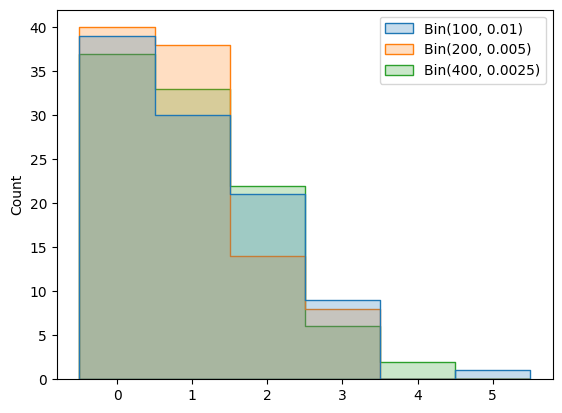

In [ ]:
sns.histplot(
    data=Bin,
    element="step",
    discrete=True,
)

<Axes: ylabel='Count'>

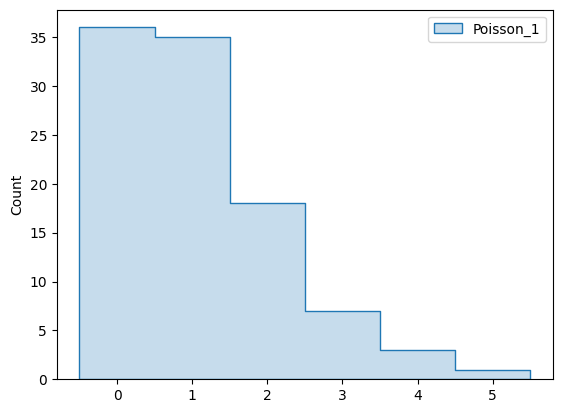

In [ ]:
sns.histplot(
    data=pd.DataFrame({"Poisson_1" : poisson_1}),
    discrete=True,
    element="step",
)

Заметим, что распределение значений из распределения Пуассона с параметром λ очень схоже с биномиальными распределениями, np которых равно λ, что иллюстрирует правильность теоремы Пуассона.

34. Сгенерировать 100 значений из равномерного на [0;2] распределения. Центрировать и нормировать сумму полученных значений согласно ЦПТ. Повторить эти две процедуры 50 раз, нарисовать гистограмму по полученным 50 значениям. Изобразить на том же графике плотность стандартного нормального закона. Проделать всё тоже самое для 200 и 300 значений сгенерированных значений. Какую теорему иллюстрируют полученные результаты?

In [ ]:
from math import sqrt

def M(a, b):
  return (a + b) / 2

def D(a, b):
  return ((b - a)**2) / 12

def sigm(a, b):
  return (sqrt(3) / 6) * (b - a)

In [ ]:
def task(size):
  min, max = 0, 2

  sample = rng.uniform(low=min, high=max, size=size)
  s = sum(sample)
  return (s - M(min, max) * size) / (sqrt(size) * sigm(min, max))

In [ ]:
sample_sizes = [50, 200, 300]

results = []
mu, sigma = 0, 1

iter = 0
for sz in sample_sizes:
  results.append([])
  for j in range(sz):
    results[iter].append(task(100))
  iter += 1

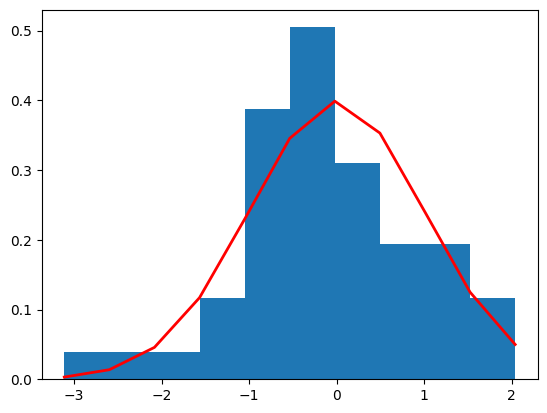

In [ ]:
count, bins, ignored = plt.hist(results[0], density=True)
plt.plot(bins,
         1/(sigma * np.sqrt(2 * np.pi)) * np.exp( -(bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

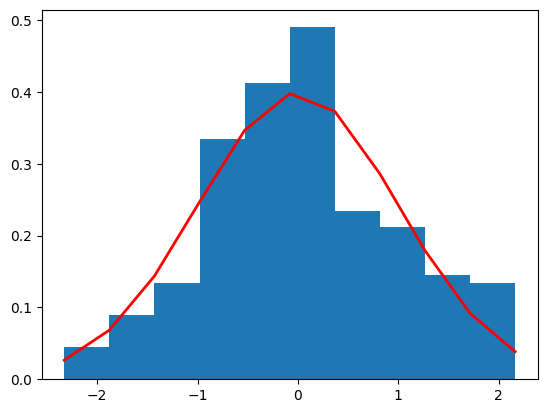

In [ ]:
count, bins, ignored = plt.hist(results[1], density=True)
plt.plot(bins,
         1/(sigma * np.sqrt(2*np.pi)) * np.exp( -(bins - mu)**2 / (2*sigma**2)),
         linewidth=2, color='r')
plt.show()

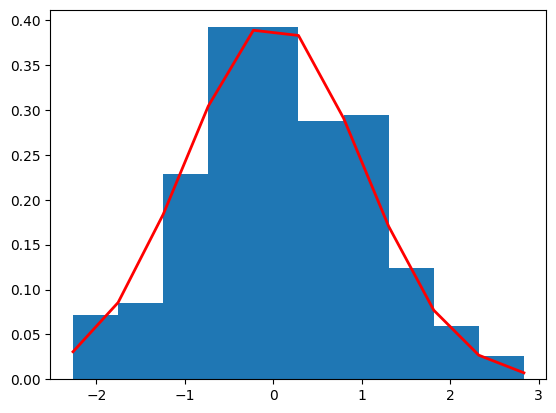

In [ ]:
count, bins, ignored = plt.hist(results[2], density=True)
plt.plot(bins,
         1/(sigma * np.sqrt(2*np.pi)) * np.exp( -(bins - mu)**2 / (2*sigma**2)),
         linewidth=2, color='r')
plt.show()

**Вывод:**

 Распределение средних значений выборок из равномерного распределения является приблизительно нормальным, если размер выборки достаточно велик.

Именно об этом говорит ЦПТ, поэтому можно сказать, что приведенные графики ее иллюстрируют.